In [325]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

np.random.seed(42)

In [326]:
df = pd.read_csv("./dataset/alzheimers_prediction_dataset.csv")
n_class = df["Alzheimer’s Diagnosis"].nunique()

df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [327]:
np.random.seed(42)
# df = pd.concat([df, A_df, O_df], ignore_index=True)
# df

In [328]:
df.groupby("fetal_health")["fetal_movement"].count()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: fetal_movement, dtype: int64

In [329]:
df["fetal_health"].unique()

array([2., 1., 3.])

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [331]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

In [332]:
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,7.2,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,7.1,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,6.1,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,7.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [333]:
data = df.to_numpy()

In [334]:
def train_test_split(data, train_split_ratio):
    np.random.shuffle(data)
    train_count = int(data.shape[0] * train_split_ratio)
    train = data[:train_count]
    test = data[train_count:]
    X_train = train[:, :-1].astype(float)
    y_train = train[:, -1]
    X_test = test[:, :-1].astype(float)
    y_test = test[:, -1]
    return X_train, y_train, X_test, y_test

In [335]:
def binary_cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-7, 1 - 1e-7)
    # Calculating loss
    loss = -1/m * (np.dot(y_true.T, np.log(y_pred)) + np.dot((1 - y_true).T, np.log(1 - y_pred)))

    return loss

In [336]:
X_train, y_train, X_test, y_test = train_test_split(data, train_split_ratio=0.9)
X_train, y_train, X_test, y_test

(array([[1.33e+02, 2.00e-03, 1.00e-02, ..., 1.38e+02, 9.00e+00, 0.00e+00],
        [1.25e+02, 0.00e+00, 1.00e-03, ..., 1.25e+02, 2.90e+01, 1.00e+00],
        [1.31e+02, 4.00e-03, 3.00e-03, ..., 1.32e+02, 2.10e+01, 0.00e+00],
        ...,
        [1.30e+02, 9.00e-03, 0.00e+00, ..., 1.38e+02, 2.00e+00, 0.00e+00],
        [1.22e+02, 1.00e-03, 0.00e+00, ..., 1.16e+02, 2.10e+01, 0.00e+00],
        [1.06e+02, 0.00e+00, 0.00e+00, ..., 1.11e+02, 2.00e+00, 0.00e+00]]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([[1.44e+02, 4.00e-03, 0.00e+00, ..., 1.55e+02, 6.00e+00, 0.00e+00],
        [1.33e+02, 5.00e-03, 5.00e-03, ..., 1.37e+02, 2.00e+00, 0.00e+00],
        [1.33e+02, 0.00e+00, 1.00e-03, ..., 1.07e+02, 5.70e+01, 0.00e+00],
        ...,
        [1.22e+02, 5.00e-03, 0.00e+00, ..., 1.26e+02, 3.10e+01, 0.00e+00],
        [1.15e+02, 3.00e-03, 0.00e+00, ..., 1.29e+02, 4.50e+01, 0.00e+00],
        [1.42e+02, 1.00e-03, 0.00e+00, ..., 1.49e+02, 4.00e+00, 1.00e+00]]),
 array([1., 1., 3., 1., 1., 1.,

In [337]:
y_train

array([1., 1., 1., ..., 1., 1., 1.])

In [338]:
uni = list(df["fetal_health"].unique())
y_train_true = np.array([y_train == u for u in uni]).T.astype(int)
y_train_true

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [339]:
y_test_true = np.array([y_test == u for u in uni]).T.astype(int)
y_test_true

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [340]:
# def sigmoid(x):
#     return 1 / (1 + np.exp(-x))

# def ReLU(x):
#     return x * (x > 0)

# def tanh(x):
#     return np.tanh(x)

# def sigmoid_derivative(x):
#     return x * (1 - x)

# activation = sigmoid

# input_layer_neurons = 4
# hidden_layer_neurons = 5
# output_layer_neurons = 3

# weights_input_hidden = np.random.uniform(-1, 1, (input_layer_neurons, hidden_layer_neurons))
# bias_hidden = np.random.uniform(-1, 1, (1, hidden_layer_neurons))

# weights_hidden_output = np.random.uniform(-1, 1, (hidden_layer_neurons, output_layer_neurons))
# bias_output = np.random.uniform(-1, 1, (1, output_layer_neurons))

# epochs = 20
# learning_rate = 0.1

# for epoch in range(epochs):
#     #propagacja do przodu
#     hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
#     hidden_layer_output = activation(hidden_layer_input)

#     output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
#     predicted_output = activation(output_layer_input)

#     error = y_train_true - predicted_output
#     print(error)

In [341]:
import math

def ReLU(x):
    return x * (x > 0)

def tanh(x):
    return np.tanh(x)

def softmax(z):
    """
    Zwraca softmax wzdłuż ostatniego wymiaru (dla każdej próbki osobno).
    Stabilna wersja: odejmujemy max(z), by uniknąć overflow.
    """
    z_shifted = z - np.max(z, axis=1, keepdims=True)
    exp_z = np.exp(z_shifted)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def softmax_cross_entropy(y_true, y_pred_prob):
    """
    Zakładamy:
      y_true: one-hot wektor (np. [0,0,1])
      y_pred_prob: prawdopodobieństwa z softmax (np. [0.1, 0.2, 0.7])
    Zwraca średni cross-entropy (loss) w całej mini-paczkce (tu: w całym zbiorze).
    """
    # Dodajemy mały epsilon, by uniknąć log(0)
    eps = 1e-9
    return -np.mean(np.sum(y_true * np.log(y_pred_prob + eps), axis=1))

def softmax_derivative(y_true, y_pred_prob):
    """
    Pochodna straty cross-entropy względem wyjścia softmax:
    dL/dz = (y_pred_prob - y_true)
    (to klasyczny wynik dla softmax + CE)
    """
    return (y_pred_prob - y_true) / y_true.shape[0]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sig_x):
    return sig_x * (1 - sig_x)


def tanh_derivative(x):
    """
    Compute the derivative of the hyperbolic tangent function.
    
    Parameters:
    x (float or np.array): Input value or array of values.
    
    Returns:
    float or np.array: The derivative of tanh at the input value(s).
    """
    tanh_x = np.tanh(x)
    return 1 - tanh_x**2


def xavier(n_in, n_out):
    return math.sqrt(6/(n_in+n_out))


def validate_train(X_test, y_test_true):
    z1 = np.dot(X_test, W1) + b1
    a1 = tanh(z1)

    z2 = np.dot(a1, W2) + b2
    y_pred_prob = softmax(z2)

    _max = y_pred_prob.max(axis=1, keepdims=True)
    y_pred = (y_pred_prob==_max).astype(int)

    loss = softmax_cross_entropy(y_test_true, y_pred_prob)

    return ((y_test_true==y_pred).sum(axis=1, keepdims=True)==n_class).sum() / y_pred.shape[0], loss


input_layer_neurons = X_train.shape[1]
hidden_layer_neurons = input_layer_neurons * 2
output_layer_neurons = n_class

a = xavier(input_layer_neurons, output_layer_neurons)

W1 = np.random.uniform(-a, a, (input_layer_neurons, hidden_layer_neurons))
b1 = np.random.uniform(-a, a, (1, hidden_layer_neurons))

W2 = np.random.uniform(-a, a, (hidden_layer_neurons, output_layer_neurons))
b2 = np.random.uniform(-a, a, (1, output_layer_neurons))

epochs = 30
learning_rate = 0.01
beta1 = 0.9  # Współczynnik dla momentu pierwszego rzędu
beta2 = 0.999  # Współczynnik dla momentu drugiego rzędu
epsilon = 1e-8  # Mała wartość, aby zapobiec dzieleniu przez zero

# Inicjalizacja momentów
m_W1 = np.zeros_like(W1)
v_W1 = np.zeros_like(W1)
m_b1 = np.zeros_like(b1)
v_b1 = np.zeros_like(b1)

m_W2 = np.zeros_like(W2)
v_W2 = np.zeros_like(W2)
m_b2 = np.zeros_like(b2)
v_b2 = np.zeros_like(b2)

# Parametry zaktualizowane w czasie treningu
t = 0  # Licznik iteracji

history = {
    "validation_accuracy": [],
    "validation_loss": [],
    "loss": []
}
for epoch in range(epochs):
    t += 1

    # 1. Forward pass (warstwa ukryta -> warstwa wyjściowa)
    z1 = np.dot(X_train, W1) + b1
    a1 = sigmoid(z1) #tanh(z1)

    z2 = np.dot(a1, W2) + b2
    y_pred_prob = softmax(z2)

    loss = softmax_cross_entropy(y_train_true, y_pred_prob)

    d_z2 = softmax_derivative(y_train_true, y_pred_prob)

    dW2 = np.dot(a1.T, d_z2)
    db2 = np.sum(d_z2, axis=0, keepdims=True)

    d_a1 = np.dot(d_z2, W2.T)
    d_z1 = d_a1 * sigmoid_derivative(a1) #tanh_derivative(a1)

    dW1 = np.dot(X_train.T, d_z1)
    db1 = np.sum(d_z1, axis=0, keepdims=True)

    m_W1 = beta1 * m_W1 + (1 - beta1) * dW1
    v_W1 = beta2 * v_W1 + (1 - beta2) * (dW1 ** 2)
    m_b1 = beta1 * m_b1 + (1 - beta1) * db1
    v_b1 = beta2 * v_b1 + (1 - beta2) * (db1 ** 2)

    m_W2 = beta1 * m_W2 + (1 - beta1) * dW2
    v_W2 = beta2 * v_W2 + (1 - beta2) * (dW2 ** 2)
    m_b2 = beta1 * m_b2 + (1 - beta1) * db2
    v_b2 = beta2 * v_b2 + (1 - beta2) * (db2 ** 2)

    # Korekcja biasu momentów
    m_W1_hat = m_W1 / (1 - beta1 ** t)
    v_W1_hat = v_W1 / (1 - beta2 ** t)
    m_b1_hat = m_b1 / (1 - beta1 ** t)
    v_b1_hat = v_b1 / (1 - beta2 ** t)

    m_W2_hat = m_W2 / (1 - beta1 ** t)
    v_W2_hat = v_W2 / (1 - beta2 ** t)
    m_b2_hat = m_b2 / (1 - beta1 ** t)
    v_b2_hat = v_b2 / (1 - beta2 ** t)

    # Aktualizacja wag i biasów
    W2 -= learning_rate * m_W2_hat / (np.sqrt(v_W2_hat) + epsilon)
    b2 -= learning_rate * m_b2_hat / (np.sqrt(v_b2_hat) + epsilon)

    W1 -= learning_rate * m_W1_hat / (np.sqrt(v_W1_hat) + epsilon)
    b1 -= learning_rate * m_b1_hat / (np.sqrt(v_b1_hat) + epsilon)

    validation_accuracy, validation_loss = validate_train(X_test, y_test_true)
    print(f"epoch {epoch+1}/{epochs}, loss: {loss} val accuracy: {validation_accuracy} val loss: {validation_loss}")
    history["validation_accuracy"].append(validation_accuracy)
    history["validation_loss"].append(validation_loss)
    history["loss"].append(loss)
    


epoch 1/30, loss: 1.1948299246131242 val accuracy: 0.6338028169014085 val loss: 0.980765142822584
epoch 2/30, loss: 0.9065937644059934 val accuracy: 0.7323943661971831 val loss: 0.770048258942132
epoch 3/30, loss: 0.740762633857026 val accuracy: 0.784037558685446 val loss: 0.6479862345064832
epoch 4/30, loss: 0.6667922812536975 val accuracy: 0.8169014084507042 val loss: 0.6075940843910992
epoch 5/30, loss: 0.6429351389330433 val accuracy: 0.8028169014084507 val loss: 0.6044724817932291
epoch 6/30, loss: 0.6442269832331953 val accuracy: 0.8075117370892019 val loss: 0.6086293639896915
epoch 7/30, loss: 0.6532826403515 val accuracy: 0.8028169014084507 val loss: 0.614905863216545
epoch 8/30, loss: 0.6636999831943349 val accuracy: 0.8028169014084507 val loss: 0.6243325378429765
epoch 9/30, loss: 0.6701974190360808 val accuracy: 0.8075117370892019 val loss: 0.6219307075953026
epoch 10/30, loss: 0.6745021103686496 val accuracy: 0.8028169014084507 val loss: 0.614206151234223
epoch 11/30, loss:

Text(0.5, 1.0, 'validation accuracy')

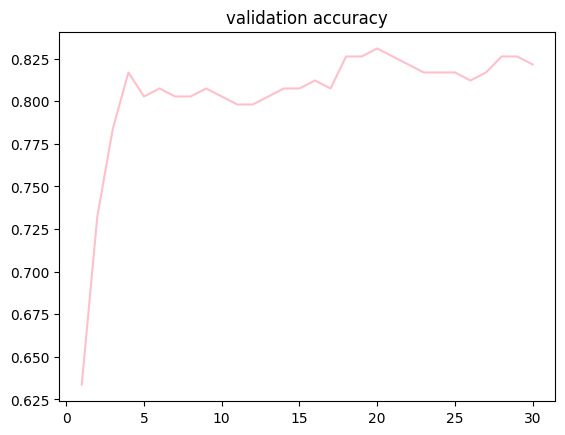

In [342]:
plt.plot(list(range(1, epochs+1)), history["validation_accuracy"], label="validation_accuracy", c="pink")
plt.title("validation accuracy")

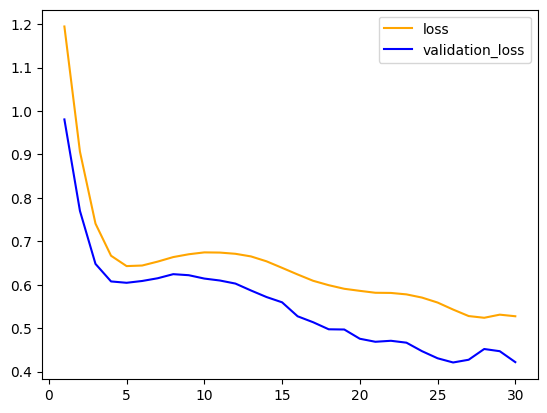

In [343]:
plt.plot(list(range(1, epochs+1)), history["loss"], label="loss", c="orange")
plt.plot(list(range(1, epochs+1)), history["validation_loss"], label="validation_loss", c="blue")
plt.legend()

In [344]:
z1 = np.dot(X_test, W1) + b1
a1 = tanh(z1)

z2 = np.dot(a1, W2) + b2
y_pred_prob = softmax(z2)

_max = y_pred_prob.max(axis=1, keepdims=True)
y_pred = (y_pred_prob==_max).astype(int)

((y_test_true==y_pred).sum(axis=1, keepdims=True)==n_class).sum() / y_pred.shape[0]

np.float64(0.8215962441314554)